# Algolia internship assignment - Louis Verrier

The provided data archive contains one month of anonymized aggregated searches coming from HN Search.

The goal of this test is to evaluate your ability to find and communicate meaningful insights in the data. We ask you to determine the 10 most popular searches (in term of number of searches in the whole dataset) and for each search, to plot its number of requests over time.

# First step
Import the json data as into a DataFrame

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json

In [3]:
from datetime import timedelta, date

def daterange(start_date, end_date):
    for n in range(int ((end_date - start_date).days)):
        yield start_date + timedelta(n)

start_date = date(2018, 6, 14)
end_date = date(2018, 7, 15)
for single_date in daterange(start_date, end_date):
    print(single_date.strftime("%Y-%m-%d"))

2018-06-14
2018-06-15
2018-06-16
2018-06-17
2018-06-18
2018-06-19
2018-06-20
2018-06-21
2018-06-22
2018-06-23
2018-06-24
2018-06-25
2018-06-26
2018-06-27
2018-06-28
2018-06-29
2018-06-30
2018-07-01
2018-07-02
2018-07-03
2018-07-04
2018-07-05
2018-07-06
2018-07-07
2018-07-08
2018-07-09
2018-07-10
2018-07-11
2018-07-12
2018-07-13
2018-07-14


In [4]:
D=0 #day number
words=[] #list of words seen in requests
occ=[] #number of occurences of the word for each of the 31 days

In [5]:
def processdate(D,df):
    for i in df.index: #range(5): 
        q=df.iloc[i]['query']
        s=q.split() #I decided to split the queries into their words and count occurences of each word
        for word in s:
            word=word.lower() #Remove uppercase
            if len(word)>3: #We consider only words with more than 3 letters
                try: #word already seen
                    j=words.index(word)
                    occ[j][D] +=1
                except: #first total occurence of the word
                    words.append(word)
                    oinit=np.zeros(31)
                    oinit[D]=1
                    occ.append(oinit)

In [6]:
import time

path_data = 'C:\hn_insights_data'

for single_date in daterange(start_date, end_date):
    file=single_date.strftime("%Y-%m-%d")

    start_time=time.time()
    data = []

    with open(os.path.join(path_data,file),errors='ignore') as train_file:
        for line in train_file:
            try:
                data.append(json.loads(line))
            except:
                pass #last line of the file is miscut
    
    df=pd.DataFrame(data)
    processdate(D,df)
    D += 1
    
    end_time=time.time()
    
    print("Day ", file, "processed, size of words list:", len(words), ", time used:", end_time-start_time)

Day  2018-06-14 processed, size of words list: 12038 , time used: 14.296876668930054
Day  2018-06-15 processed, size of words list: 18836 , time used: 13.906469583511353
Day  2018-06-16 processed, size of words list: 23664 , time used: 11.937219858169556
Day  2018-06-17 processed, size of words list: 27812 , time used: 13.468965530395508
Day  2018-06-18 processed, size of words list: 33015 , time used: 23.11739945411682
Day  2018-06-19 processed, size of words list: 38211 , time used: 25.8302161693573
Day  2018-06-20 processed, size of words list: 42710 , time used: 26.792861700057983
Day  2018-06-21 processed, size of words list: 46652 , time used: 25.864781856536865
Day  2018-06-22 processed, size of words list: 50542 , time used: 27.09706473350525
Day  2018-06-23 processed, size of words list: 53799 , time used: 23.89493155479431
Day  2018-06-24 processed, size of words list: 56866 , time used: 24.149137258529663
Day  2018-06-25 processed, size of words list: 60516 , time used: 32.5

In [7]:
print(len(words),len(occ))

121659 121659


In [8]:
total=[sum(l) for l in occ]
mymap=list((w, t) for (w, t) in zip(words,total))
sortedmap=sorted(mymap, key=lambda tup: tup[1], reverse=True)
print(mymap[:10])
print(sortedmap[:10])

[('real', 767.0), ('estate', 294.0), ('bird', 237.0), ('kitchen', 37.0), ('sink', 11.0), ('canada', 389.0), ('google', 7492.0), ('speech', 228.0), ('bitcoin', 2428.0), ('telephone', 10.0)]
[('python', 19972.0), ('google', 7492.0), ('hiring', 7113.0), ('with', 7008.0), ('rust', 6202.0), ('react', 5602.0), ('show', 5494.0), ('tesla', 4817.0), ('data', 4508.0), ('learning', 4473.0)]


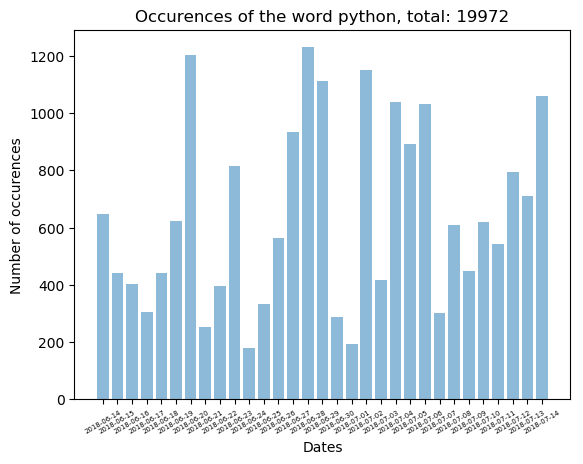

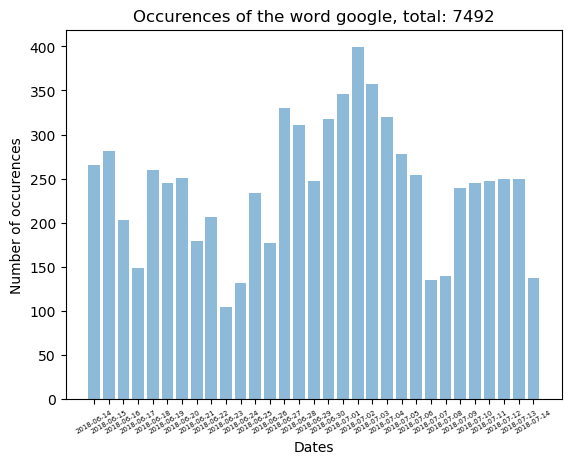

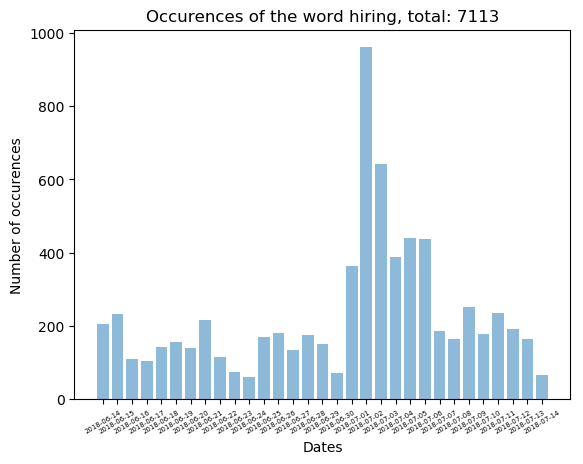

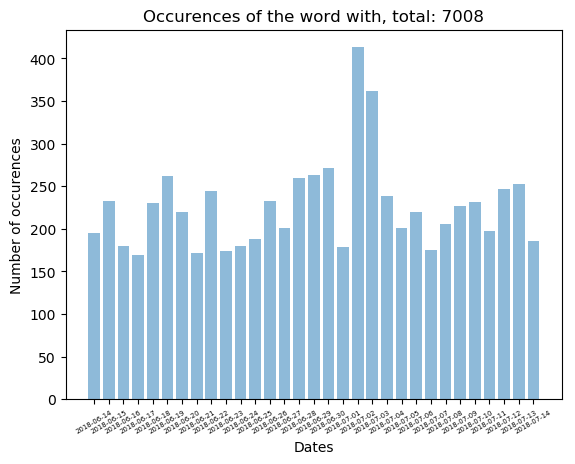

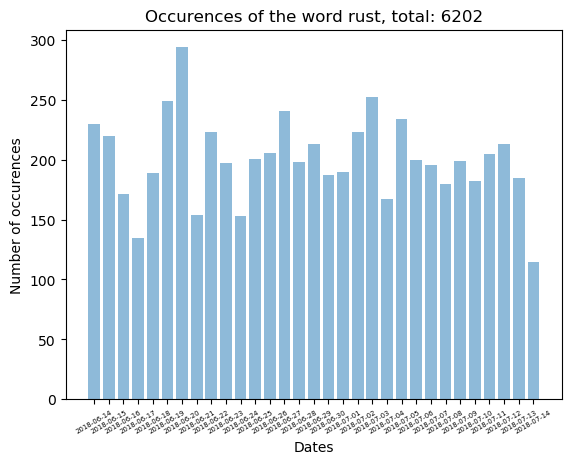

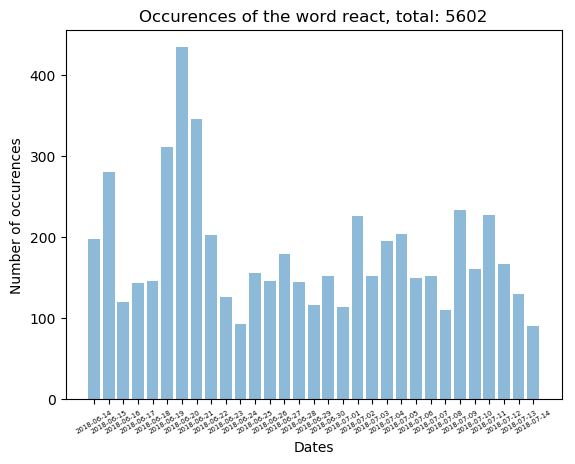

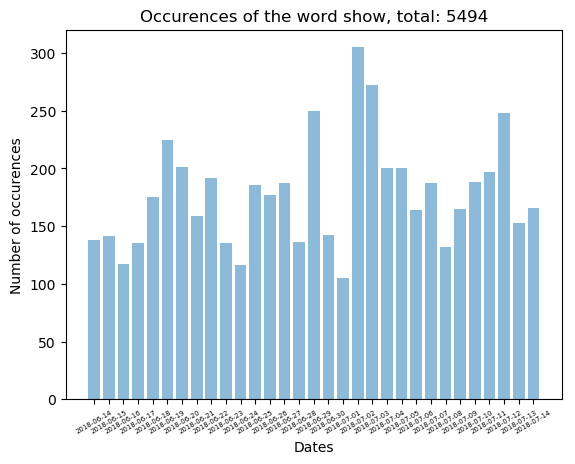

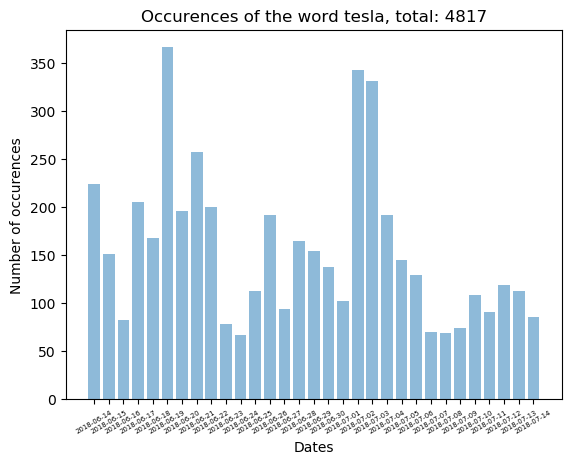

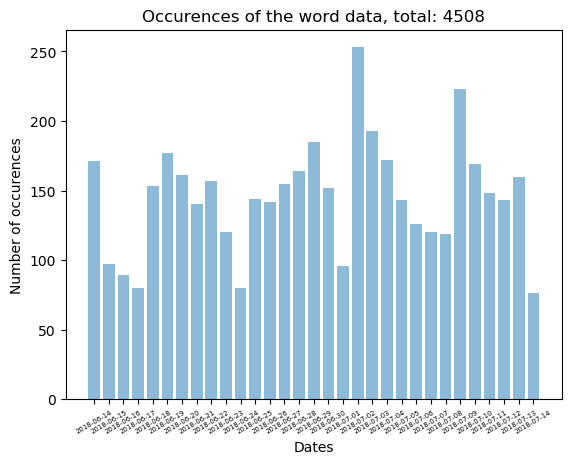

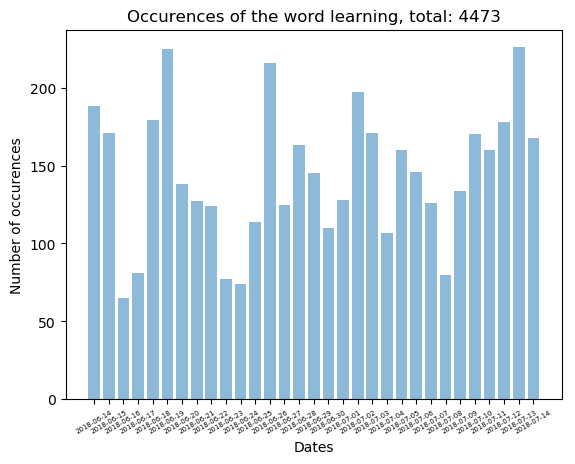

In [21]:
import matplotlib.pyplot as plt

dates = list(daterange(start_date, end_date))
y_pos = np.arange(len(dates))

for (word,count) in sortedmap[:10]:
    j=words.index(word)
    occurences = occ[j]
 
    plt.bar(y_pos, occurences, align='center', alpha=0.5)
    plt.xticks(y_pos, dates,fontsize=5, rotation=30)
    plt.xlabel('Dates')
    plt.ylabel('Number of occurences')
    plt.title('Occurences of the word ' + word + ', total: %i' %count )
 
    plt.show()